In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
keys_ordered = ["ATSP/br17.atsp", "ATSP/ftv33.atsp", "ATSP/ftv38.atsp", "ATSP/ry48p.atsp", "ATSP/ft53.atsp", "ATSP/ftv55.atsp", "ATSP/ft70.atsp", "ATSP/kro124p.atsp"]

f = open("../TSandSA_indepth_4.txt", "r")
text = f.read()

optimas = {}
optimas[keys_ordered[0]] = 39
optimas[keys_ordered[1]] = 1286
optimas[keys_ordered[2]] = 1530
optimas[keys_ordered[3]] = 14422
optimas[keys_ordered[4]] = 6905
optimas[keys_ordered[5]] = 1608
optimas[keys_ordered[6]] = 38673
optimas[keys_ordered[7]] = 36230

In [72]:
cases = {}
casename = ""
algorithm = ""
for line in text.split("\n"):
    if line[:7] == "Problem":
        casename = line[8:-1]
        cases[casename] = {}
    if len(line.split()) > 1 and line.split()[1] == "runs":
        algorithm = line.split()[0]
        cases[casename][algorithm] = {}
    
    elements = line.split()

    if len(elements) == 4 and elements[0] == "avg_evals:":
        cases[casename][algorithm]["avg_evals"] = int(elements[1]) / 1000
        cases[casename][algorithm]["sd_evals"] = int(elements[3]) / 1000
    if len(elements) == 4 and elements[0] == "avg_steps:":
        cases[casename][algorithm]["avg_steps"] = int(elements[1])
        cases[casename][algorithm]["sd_steps"] = int(elements[3])
        
    if len(elements) > 6:
        cases[casename][algorithm]["min"] = int(elements[0])
        cases[casename][algorithm]["avg"] = int(elements[1])
        cases[casename][algorithm]["sd"]  = int(elements[2])
        cases[casename][algorithm]["max"] = int(elements[3])
        cases[casename][algorithm]["avg_time"] = int(elements[4][:-4])
        cases[casename][algorithm]["sd_time"] = int(elements[5][:-4])
        
        cases[casename][algorithm]["Qmin"] = (cases[casename][algorithm]["min"] - optimas[casename]) / optimas[casename]
        cases[casename][algorithm]["Qavg"] = (cases[casename][algorithm]["avg"] - optimas[casename]) / optimas[casename]
        cases[casename][algorithm]["Qavg_sd"] = cases[casename][algorithm]["sd"] / optimas[casename]

        #cases[casename][algorithm]["efficiency"] = 1 / (cases[casename][algorithm]["Qavg"] * (1/3)) / cases[casename][algorithm]["avg_time"]


        cases[casename][algorithm]["efficiency"] = cases[casename][algorithm]["Qavg"] / cases[casename][algorithm]["avg_time"]
        ### Check the efficiency
        cases[casename][algorithm]["cycle"] = [i for i in elements[6:]]

        next_dict = {}
        for index, item in enumerate(cases[casename][algorithm]["cycle"]):
            next_dict[item] = cases[casename][algorithm]["cycle"][(index + 1)% len(cases[casename][algorithm]["cycle"])]

        cases[casename][algorithm]["next_dict"] = next_dict

cases = {i: cases[i] for i in keys_ordered if i in cases.keys()}

In [73]:
def cycle_similarity(c1, c2_dict):
    same_edge_count = 0
    for index, node in enumerate(c1):
        if c2_dict[node] == c1[(index+1) % len(c1)]: 
            same_edge_count += 1

    return same_edge_count / len(c1)

In [74]:
print(cycle_similarity(cases["ATSP/br17.atsp"]["G"]["cycle"], cases["ATSP/br17.atsp"]["G"]["next_dict"]))
print(cycle_similarity(cases["ATSP/br17.atsp"]["TS"]["cycle"], cases["ATSP/br17.atsp"]["G"]["next_dict"]))
print(cycle_similarity(cases["ATSP/br17.atsp"]["SA"]["cycle"], cases["ATSP/br17.atsp"]["G"]["next_dict"]))

1.0
0.29411764705882354
0.11764705882352941


In [75]:
print(cases)

{'ATSP/br17.atsp': {'TS': {'avg_evals': 1484.075, 'sd_evals': 47.622, 'min': 39, 'avg': 39, 'sd': 0, 'max': 39, 'avg_time': 36332, 'sd_time': 2464, 'Qmin': 0.0, 'Qavg': 0.0, 'Qavg_sd': 0.0, 'efficiency': 0.0, 'cycle': ['0', '11', '2', '13', '10', '12', '9', '1', '5', '14', '15', '6', '4', '3', '16', '7', '8'], 'next_dict': {'0': '11', '11': '2', '2': '13', '13': '10', '10': '12', '12': '9', '9': '1', '1': '5', '5': '14', '14': '15', '15': '6', '6': '4', '4': '3', '3': '16', '16': '7', '7': '8', '8': '0'}}, 'SA': {'avg_evals': 14348.972, 'sd_evals': 225.794, 'min': 39, 'avg': 39, 'sd': 0, 'max': 39, 'avg_time': 31943, 'sd_time': 3290, 'Qmin': 0.0, 'Qavg': 0.0, 'Qavg_sd': 0.0, 'efficiency': 0.0, 'cycle': ['11', '13', '2', '9', '10', '12', '1', '16', '8', '7', '4', '3', '5', '15', '6', '14', '0'], 'next_dict': {'11': '13', '13': '2', '2': '9', '9': '10', '10': '12', '12': '1', '1': '16', '16': '8', '8': '7', '7': '4', '4': '3', '3': '5', '5': '15', '15': '6', '6': '14', '14': '0', '0': '1

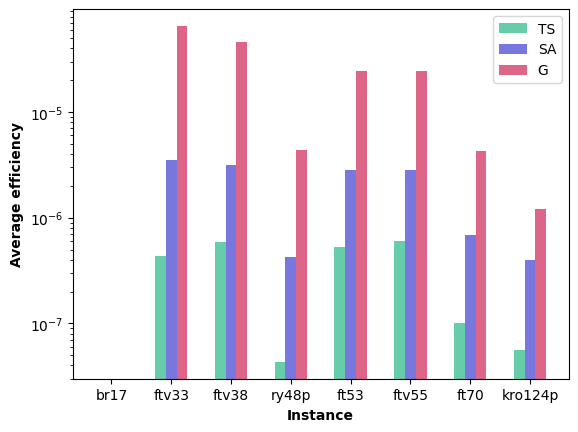

In [76]:
dataset = {}
for algorithm in list(cases[list(cases.keys())[0]].keys()):
    dataset[algorithm] = [cases[case][algorithm]["efficiency"] for case in cases.keys()]

ticks = [i[5:-5] for i in list(cases.keys())] ### instances
 
barWidth = 0.18
 
r_list = []
r_list.append(np.arange(len(dataset["G"])))
for i in range(len(dataset.keys()) - 1):
    r_list.append([x + barWidth for x in r_list[-1]])

colors = ["#66ccaa", "#7777dd", "#dd6688", "#ddaa55", "#aa99dd"]
 
for index, key in enumerate(list(dataset.keys())):
    plt.bar(r_list[index], dataset[key], log = True, color = colors[index], width=barWidth, label=key)
 
#plt.title("Average efficiency of each algorithm per instance", fontweight='bold')
plt.xlabel('Instance', fontweight='bold')
plt.ylabel('Average efficiency', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(dataset["G"]))], ticks)
 
plt.legend()
plt.savefig('efficTSSA.pdf')
plt.show()

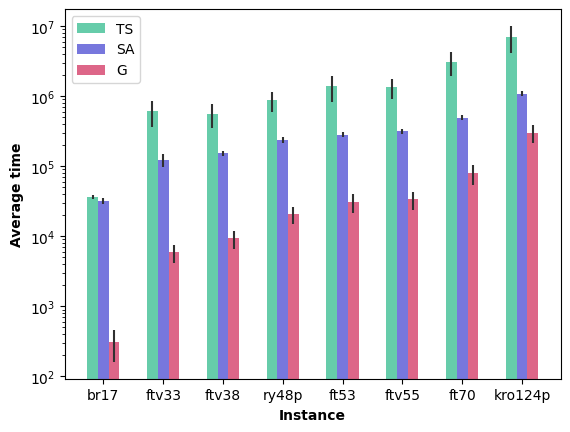

In [77]:
dataset = {}
error = {}
for algorithm in list(cases[list(cases.keys())[0]].keys()):
    dataset[algorithm] = [cases[case][algorithm]["avg_time"] for case in cases.keys()]
    error[algorithm] = [cases[case][algorithm]["sd_time"] for case in cases.keys()]

ticks = [i[5:-5] for i in list(cases.keys())] ### instances
 
barWidth = 0.18
 
r_list = []
r_list.append(np.arange(len(dataset["G"])))
for i in range(len(dataset.keys()) - 1):
    r_list.append([x + barWidth for x in r_list[-1]])

colors = ["#66ccaa", "#7777dd", "#dd6688", "#ddaa55", "#aa99dd"]
 
for index, key in enumerate(list(dataset.keys())):
    plt.bar(r_list[index], dataset[key], log = True, color = colors[index], width=barWidth, label=key)
    plt.errorbar(r_list[index], dataset[key], error[key], linestyle='None', color='#303030')
 
#plt.title("Average time of each algorithm per instance", fontweight='bold')
plt.xlabel('Instance', fontweight='bold')
plt.ylabel('Average time', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(dataset["G"]))], ticks)
 
plt.legend()
plt.savefig('timesTSSA.pdf')
plt.show()


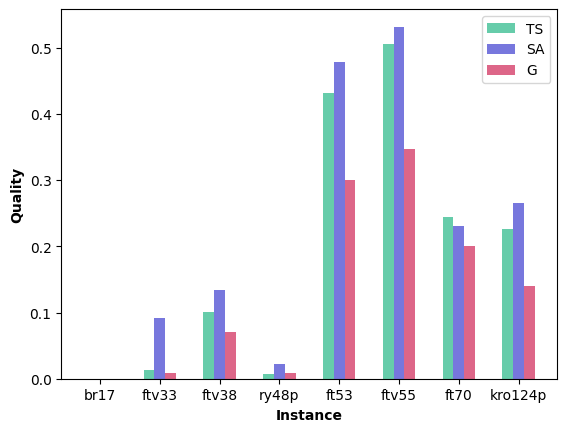

In [78]:
dataset = {}
for algorithm in list(cases[list(cases.keys())[0]].keys()):
    dataset[algorithm] = [cases[case][algorithm]["Qmin"] for case in cases.keys()]

ticks = [i[5:-5] for i in list(cases.keys())] ### instances
 
barWidth = 0.18
 
r_list = []
r_list.append(np.arange(len(dataset["G"])))
for i in range(len(dataset.keys()) - 1):
    r_list.append([x + barWidth for x in r_list[-1]])

colors = ["#66ccaa", "#7777dd", "#dd6688", "#ddaa55", "#aa55dd"]
 
for index, key in enumerate(list(dataset.keys())):
    plt.bar(r_list[index], dataset[key], color = colors[index], width=barWidth, label=key)

#plt.title("Quality measure of best solution for each algorithm and instance,\n with respect to the best known solution", fontweight='bold')
plt.xlabel('Instance', fontweight='bold')
plt.ylabel('Quality', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(dataset["G"]))], ticks)
 
plt.legend()
plt.savefig('quality_bestTSSA.pdf')
plt.show()

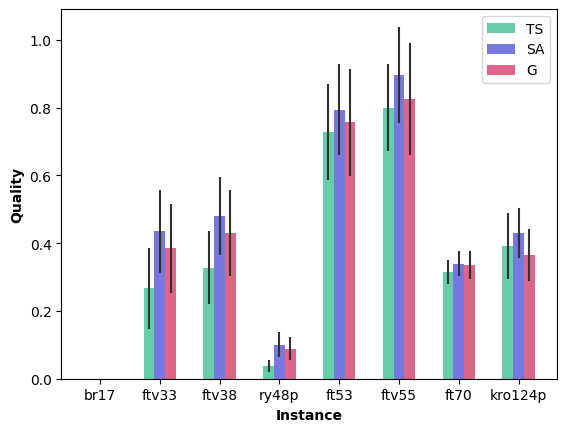

In [79]:
dataset = {}
error = {}
for algorithm in list(cases[list(cases.keys())[0]].keys()):
    dataset[algorithm] = [cases[case][algorithm]["Qavg"] for case in cases.keys()]
    error[algorithm] = [cases[case][algorithm]["Qavg_sd"] for case in cases.keys()]
    

ticks = [i[5:-5] for i in list(cases.keys())] ### instances
 
barWidth = 0.18
 
r_list = []
r_list.append(np.arange(len(dataset["G"])))
for i in range(len(dataset.keys()) - 1):
    r_list.append([x + barWidth for x in r_list[-1]])

colors = ["#66ccaa", "#7777dd", "#dd6688", "#ddaa55", "#aa55dd"]
 
for index, key in enumerate(list(dataset.keys())):
    plt.bar(r_list[index], dataset[key], color = colors[index], width=barWidth, label=key)

    plt.errorbar(r_list[index], dataset[key], error[key], linestyle='None', color='#303030')

#plt.title("Quality measure of average solution for each algorithm and instance,\n with respect to the best known solution", fontweight='bold')
plt.xlabel('Instance', fontweight='bold')
plt.ylabel('Quality', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(dataset["G"]))], ticks)
 
plt.legend()
plt.savefig('quality_avgTSSA.pdf')
plt.show()